f:\Users\Hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


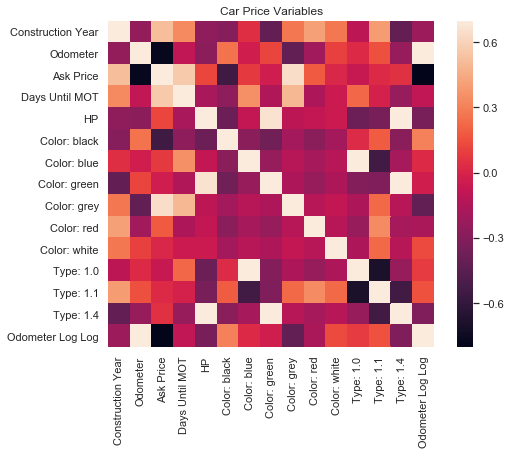

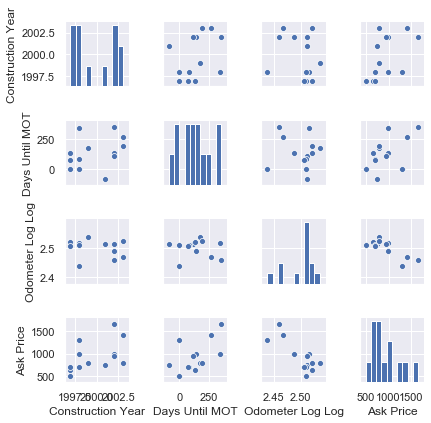

f:\Users\Hp\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


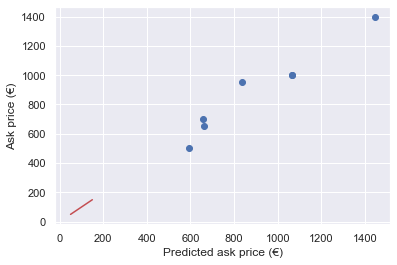

Predicted ask price: €801.15


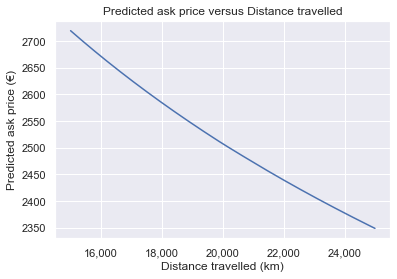

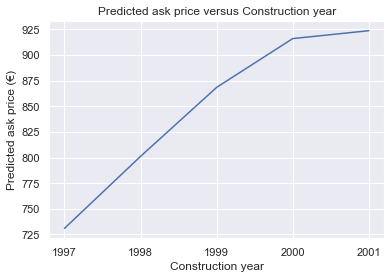

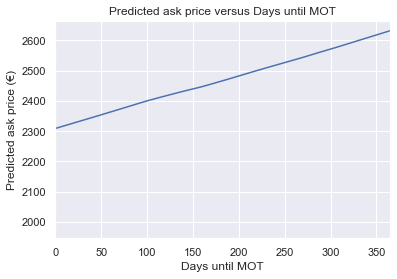

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()
data = """
Brand,Type,Color,Construction Year,Odometer,Ask Price,Days Until MOT,HP
Peugeot 106,1.0,blue,2002,166879,999,138,60
Peugeot 106,1.0,blue,1998,234484,999,346,60
Peugeot 106,1.1,black,1997,219752,500,-5,60
Peugeot 106,1.1,red,2001,223692,750,-87,60
Peugeot 106,1.1,grey,2002,120275,1650,356,59
Peugeot 106,1.1,red,2003,131358,1399,266,60
Peugeot 106,1.1,green,1999,304277,799,173,57
Peugeot 106,1.4,green,1998,93685,1300,0,75
Peugeot 106,1.1,white,2002,225935,950,113,60
Peugeot 106,1.4,green,1997,252319,650,133,75
Peugeot 106,1.0,black,1998,220000,700,82,50
Peugeot 106,1.1,black,1997,212000,700,75,60
Peugeot 106,1.1,black,2003,255134,799,197,60
"""

# Write this dataset to a file and read it
with open('data.csv', 'w') as output_file:
    output_file.write(data)
df = pd.read_csv('data.csv')
# Convert the color column to one binary column for each color
df_colors = df['Color'].str.get_dummies().add_prefix('Color: ')
# Convert the type column to one binary column for each type
df_type = df['Type'].apply(str).str.get_dummies().add_prefix('Type: ')

# Add all dummy columns
df = pd.concat([df, df_colors, df_type], axis=1)
# And drop all categorical columns
df = df.drop(['Brand', 'Type', 'Color'], axis=1)
df['Odometer Log Log'] = np.log(np.log(df['Odometer']))
matrix = df.corr()
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(matrix, vmax=0.7, square=True)
plt.title('Car Price Variables')
sns.pairplot(df[['Construction Year', 'Days Until MOT', 'Odometer Log Log', 'Ask Price']], size=1.5)
plt.show()

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

X = df[['Construction Year', 'Days Until MOT', 'Odometer Log Log']]
y = df['Ask Price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

X_normalizer = StandardScaler()
X_train = X_normalizer.fit_transform(X_train)
X_test = X_normalizer.transform(X_test)

y_normalizer = StandardScaler()
y_train = y_normalizer.fit_transform(y_train)
y_test = y_normalizer.transform(y_test)

model = MLPRegressor(hidden_layer_sizes=(100, 100), random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred_inv = y_normalizer.inverse_transform(y_pred)
y_test_inv = y_normalizer.inverse_transform(y_test)

# Build a plot
plt.scatter(y_pred_inv, y_test_inv)
plt.xlabel('Prediction')
plt.ylabel('Real value')

# Now add the perfect prediction line
diagonal = np.linspace(50, 150, 100)
plt.plot(diagonal, diagonal, '-r')
plt.xlabel('Predicted ask price (€)')
plt.ylabel('Ask price (€)')
plt.show()
distances = np.linspace(15000, 25000, 1000)

my_car = pd.DataFrame([
    {
        'Construction Year': 1998,
        'Odometer': odometer,
        'Days Until MOT': 150
    }
for odometer in distances])

my_car['Odometer Log Log'] = np.log(np.log(my_car['Odometer']))
X_custom = my_car[['Construction Year', 'Days Until MOT', 'Odometer Log Log']]
X_custom = X_normalizer.transform(X_custom)

y_pred = model.predict(X_custom)
price_prediction = y_normalizer.inverse_transform(y_pred)

fig, ax = plt.subplots(1, 1)
ax.plot(distances, price_prediction)
ax.get_xaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Distance travelled (km)')
ax.set_ylabel('Predicted ask price (€)')
plt.title('Predicted ask price versus Distance travelled')

construction_years = list(range(1997, 2001 + 1))

my_car = pd.DataFrame([
    {
        'Construction Year': construction_year,
        'Odometer': 220000,
        'Days Until MOT': 150
    }
for construction_year in construction_years])

my_car['Odometer Log Log'] = np.log(np.log(my_car['Odometer']))
X_custom = my_car[['Construction Year', 'Days Until MOT', 'Odometer Log Log']]
X_custom = X_normalizer.transform(X_custom)

y_pred = model.predict(X_custom)
price_prediction = y_normalizer.inverse_transform(y_pred)

fig, ax = plt.subplots(1, 1)
ax.plot(construction_years, price_prediction)
plt.xticks(construction_years, construction_years)
ax.set_xlabel('Construction year')
ax.set_ylabel('Predicted ask price (€)')
plt.title('Predicted ask price versus Construction year')
days_until_MOT = np.linspace(-365, 365, 100)

my_car = pd.DataFrame([
    {
        'Construction Year': 1998,
        'Odometer': 22000,
        'Days Until MOT': days
    }
for days in days_until_MOT])

my_car['Odometer Log Log'] = np.log(np.log(my_car['Odometer']))
X_custom = my_car[['Construction Year', 'Days Until MOT', 'Odometer Log Log']]
X_custom = X_normalizer.transform(X_custom)

y_pred = model.predict(X_custom)
price_prediction = y_normalizer.inverse_transform(y_pred)

fig, ax = plt.subplots(1, 1)
ax.plot(days_until_MOT, price_prediction)
ax.set_xlabel('Days until MOT')
ax.set_ylabel('Predicted ask price (€)')
ax.set_xlim(0, 365)
plt.title('Predicted ask price versus Days until MOT')

my_car = pd.DataFrame([
    {
        'Construction Year': 1998,
        'Odometer': 220000,
        'Days Until MOT': 150
    }
])

my_car['Odometer Log Log'] = np.log(np.log(my_car['Odometer']))
X_custom = my_car[['Construction Year', 'Days Until MOT', 'Odometer Log Log']]
X_custom = X_normalizer.transform(X_custom)

y_pred = model.predict(X_custom)
price_prediction = y_normalizer.inverse_transform(y_pred)
print('Predicted ask price: €%.2f' % price_prediction)